# Frequency Combination Task - PLSTM

This is the second task in the NIPS '16 paper "Phased LSTM: Accelerating Recurrent Network Training for Long or Event-based Sequences" by Daniel Neil, Michael Pfeiffer, and Shih-Chii Liu.  We begin with imports:

In [1]:
import glob
import sys
import numpy as np

from collections import defaultdict
from lasagne_utils import load_log
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)


def get_min_mean_max(log_files, key='val_acc', clip_to_shortest=True, clip_length=None):
    logs = []
    for log_file in log_files:
        logs.append(load_log(log_file, append_dir=False))
    if clip_to_shortest:
        clip_length = np.min([len(log[key]) for log in logs])
    min_line = np.min([log[key][:clip_length] for log in logs], axis=0)
    mean_line = np.mean([log[key][:clip_length] for log in logs], axis=0)
    max_line = np.max([log[key][:clip_length] for log in logs], axis=0)
    return min_line, mean_line, max_line

def get_mean_std_at_pos(log_files, key, pos=-1):
    logs = []
    for log_file in log_files:
        logs.append(load_log(log_file, append_dir=False))
    scores = [log[key][pos] for log in logs]
    mean = np.mean(scores)
    std = np.std(scores)
    return mean, std

# Define some colors for plotting
PLSTM_COLOR='#33a02c'
BN_LSTM_COLOR='#6a3d9a'
LSTM_COLOR='#1f78b4'

Key plstm--bn--0: 5 results.
Key lstm--bn--1: 5 results.
Key lstm--bn--0: 5 results.


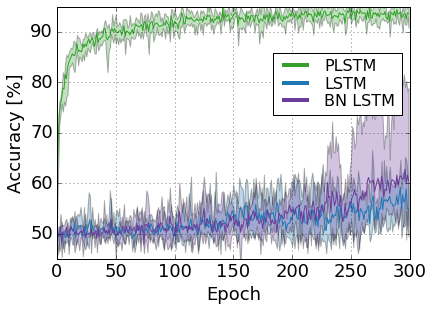

In [3]:
# Find the results for this experiment and build a matrix with the averages
result_files = glob.glob('./models/freq_task*task2*final.log')
results = defaultdict(list)

for result_file in result_files:
    result_attribs = result_file.split('_')
    net_type_key = '--'.join(result_attribs[3:6])
    results[net_type_key].append(result_file)
    
color_dict = {'plstm--bn--0':PLSTM_COLOR, 'lstm--bn--1':LSTM_COLOR, 'lstm--bn--0':BN_LSTM_COLOR}
label_dict = {'plstm--bn--0':'PLSTM', 'lstm--bn--1':'LSTM', 'lstm--bn--0':'BN LSTM'}

fig = plt.figure(figsize=(7,5))
ax = plt.gca()
labels = []
for net_key in results.keys():
    print('Key {}: {} results.'.format(net_key, len(results[net_key])))
    min_line, mean_line, max_line = get_min_mean_max(results[net_key])
    plt.plot(mean_line, color=color_dict[net_key])
    ax.fill_between(range(len(mean_line)), min_line, max_line, 
                    facecolor=color_dict[net_key], alpha=0.3)    
    labels.append(label_dict[net_key])
plt.grid(True,which='both')
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')    
plt.ylim([45, 95])
leg=plt.legend(labels, loc='upper right', labelspacing=0.15, fontsize=16)

# Change to location of the legend. 
bb = leg.legendPatch.get_bbox()
yOffset = -0.15
newY0 = bb.y0 + yOffset
newY1 = bb.y1 + yOffset
bb.set_points([[bb.x0,newY0], [bb.x1, newY1]])
leg.set_bbox_to_anchor(bb)

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
plt.gcf().subplots_adjust(bottom=0.2, left=0.2)

plt.savefig('images/task2_acc.pdf')
plt.savefig('images/task2_acc.png')